In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

In [4]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
# select setosa and versicolor
y = df.iloc[0:100,4].to_numpy() 
y = np.where(y =='Iris-setosa',-1,1)

In [5]:
#extract sepal length and petal lenght 
X = df.iloc[0:100,[0,2]].to_numpy() 


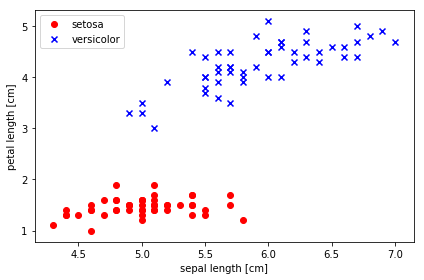

In [6]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./images/02_06.png', dpi=300)
plt.show()

In [29]:
from perceptron import Perceptron

In [28]:
import importlib
importlib.reload(sys.modules["perceptron"])

<module 'perceptron' from '/Users/krish.mahajan@ibm.com/Desktop/Documents_Desktop/Github/Python-Codes/Python-Codes.PythonMachineLearning.chap2/MLAlgo/perceptron.py'>

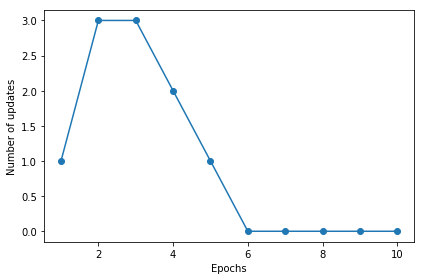

In [33]:
#train the data 

ppn = Perceptron(eta=0.1,n_iter=10,shuffle = False) 
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_) +1),ppn.errors_ , marker ='o') 
plt.xlabel('Epochs')
plt.ylabel('Number of updates') 
plt.tight_layout()
plt.show()

In [64]:
from AdalineBGD import AdalineBGD


In [65]:
import importlib
importlib.reload(sys.modules["AdalineBGD"])

<module 'AdalineBGD' from '/Users/krish.mahajan@ibm.com/Desktop/Documents_Desktop/Github/Python-Codes/Python-Codes.PythonMachineLearning.chap2/MLAlgo/AdalineBGD.py'>

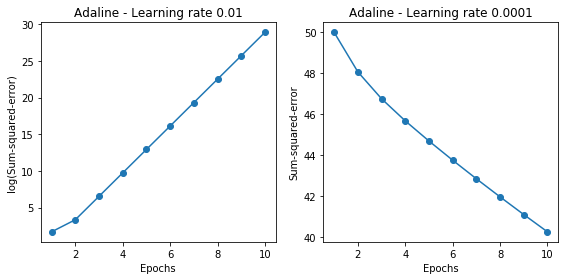

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4)) 
ada1 = AdalineBGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineBGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
# plt.savefig('./adaline_1.png', dpi=300)
plt.show()

In [59]:
# standardize features 
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

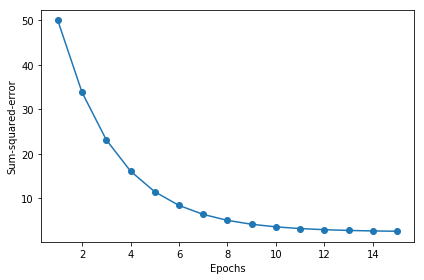

In [67]:
ada = AdalineBGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)


plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()

In [92]:
from AdalineSGD import AdalineSGD
import importlib
importlib.reload(sys.modules["AdalineSGD"])

<module 'AdalineSGD' from '/Users/krish.mahajan@ibm.com/Desktop/Documents_Desktop/Github/Python-Codes/Python-Codes.PythonMachineLearning.chap2/MLAlgo/AdalineSGD.py'>

In [93]:

ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y) 

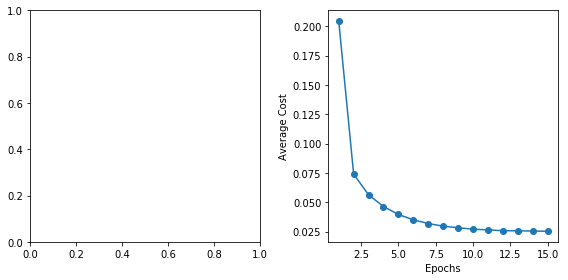

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4)) 
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('./adaline_5.png', dpi=300)
plt.show()

In [85]:
ada.cost_

[0.20480254354640479]